# Handwritten Image Prediction using Convolutional Neural Network

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import tensorflow as tf
from tensorflow import keras

print(f'Using TensorFlow version {tf.__version__}')

Using TensorFlow version 2.17.0


## Download and prepare the MNIST data

In [20]:
from keras.datasets import mnist

# Download data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Scale the pixel data to be in the range [0..1]
X_train = X_train / 255.0
X_test  = X_test / 255.0

print(f'Training data   -  X: {X_train.shape}, y: {y_train.shape}')
print(f'Test data       -  X: {X_test.shape}, y: {y_test.shape}')

Training data   -  X: (60000, 28, 28), y: (60000,)
Test data       -  X: (10000, 28, 28), y: (10000,)


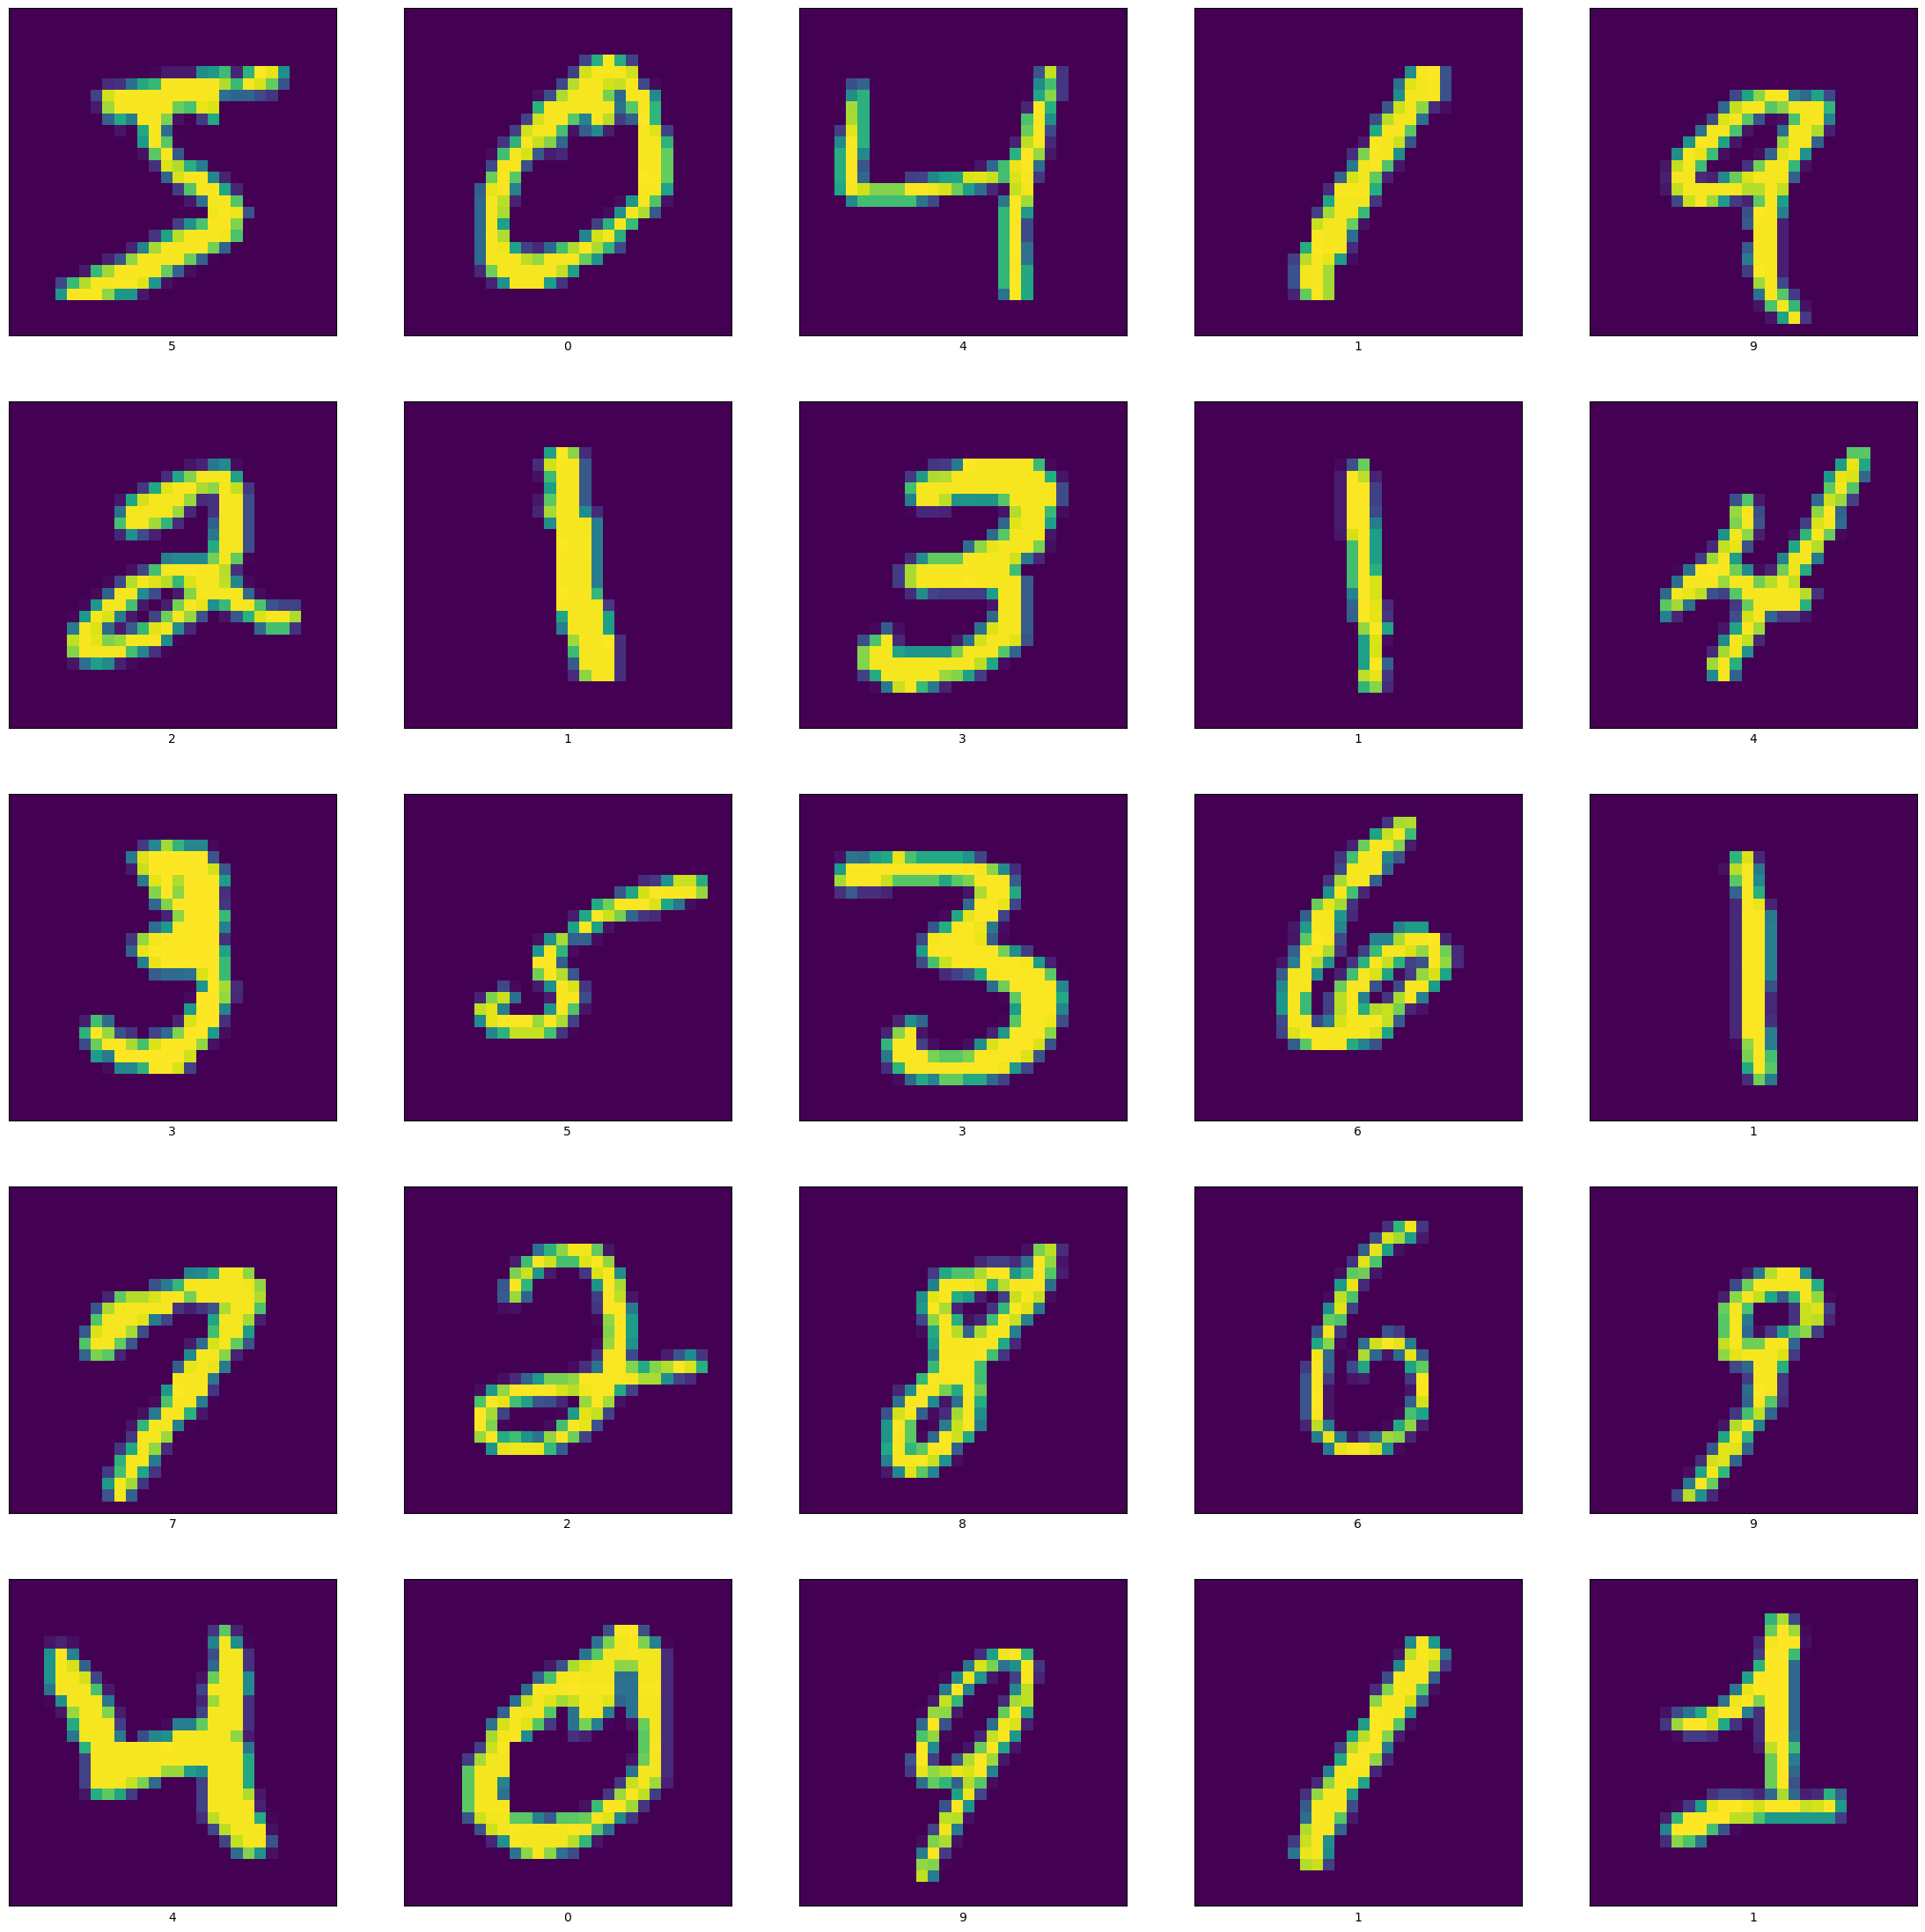

In [21]:
plt.figure(figsize=(28,28))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(y_train[i])
plt.show()

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,810 (971.91 KB)

 Trainable params: 248,810 (971.91 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [25]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=8,
    restore_best_weights=True,
)

In [26]:
model.fit(
    X_train,
    y_train,
    epochs=25, 
    validation_split=0.2,
    callbacks=[early_stopping_cb]
)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8925 - loss: 0.3461 - val_accuracy: 0.9821 - val_loss: 0.0607
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9849 - loss: 0.0481 - val_accuracy: 0.9816 - val_loss: 0.0586
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9898 - loss: 0.0349 - val_accuracy: 0.9843 - val_loss: 0.0588
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9926 - loss: 0.0237 - val_accuracy: 0.9842 - val_loss: 0.0537
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9941 - loss: 0.0195 - val_accuracy: 0.9893 - val_loss: 0.0414
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9955 - loss: 0.0135 - val_accuracy: 0.9878 - val_loss: 0.0455
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9962 - loss: 0.0118 - val_accuracy: 0.9879 - val_loss: 0.0516
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9964 - loss: 0.0116 - 

In [27]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [28]:
model.fit(
    X_train,
    y_train,
    epochs=25, 
    validation_split=0.2,
    callbacks=[early_stopping_cb]
)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9970 - loss: 0.0092 - val_accuracy: 0.9914 - val_loss: 0.0337
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9981 - loss: 0.0068 - val_accuracy: 0.9918 - val_loss: 0.0322
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9988 - loss: 0.0051 - val_accuracy: 0.9921 - val_loss: 0.0319
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9990 - loss: 0.0039 - val_accuracy: 0.9921 - val_loss: 0.0317
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9922 - val_loss: 0.0319
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9989 - loss: 0.0034 - val_accuracy: 0.9921 - val_loss: 0.0322
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9922 - val_loss: 0.0325
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9994 - loss: 0.0024 - 

In [29]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9895 - loss: 0.0344


[0.027357839047908783, 0.9919000267982483]

# 64 filters in the convolutional layers

In [30]:
model_64_filters = keras.models.Sequential()
model_64_filters.add(keras.layers.Input(shape=(28,28,1)))
model_64_filters.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_64_filters.add(keras.layers.MaxPooling2D((2, 2)))
model_64_filters.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_64_filters.add(keras.layers.MaxPooling2D((2, 2)))
model_64_filters.add(keras.layers.Flatten())
model_64_filters.add(keras.layers.Dense(256, activation='relu'))
model_64_filters.add(keras.layers.Dense(128, activation='relu'))
model_64_filters.add(keras.layers.Dense(10, activation='softmax'))
model_64_filters.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481,610 (1.84 MB)

 Trainable params: 481,610 (1.84 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model_64_filters.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model_64_filters.fit(
    X_train,
    y_train,
    epochs=25, 
    validation_split=0.2,
    callbacks=[early_stopping_cb]
)
model_64_filters.evaluate(X_test, y_test)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5206 - loss: 1.8216 - val_accuracy: 0.8862 - val_loss: 0.4503
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8872 - loss: 0.4160 - val_accuracy: 0.9279 - val_loss: 0.2653
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9249 - loss: 0.2633 - val_accuracy: 0.9429 - val_loss: 0.2070
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9402 - loss: 0.2144 - val_accuracy: 0.9511 - val_loss: 0.1745
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9495 - loss: 0.1742 - val_accuracy: 0.9572 - val_loss: 0.1519
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9535 - loss: 0.1568 - val_accuracy: 0.9629 - val_loss: 0.1337
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9590 - loss: 0.1388 - val_accuracy: 0.9653 - val_loss: 0.1237
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9648 - loss: 0.1202 -

[0.4564383924007416, 0.8862000107765198]

# additional convolution and max pooling layer pair

In [32]:
model_extra_convolution = keras.models.Sequential()
model_extra_convolution.add(keras.layers.Input(shape=(28,28,1)))
model_extra_convolution.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_extra_convolution.add(keras.layers.MaxPooling2D((2, 2)))
model_extra_convolution.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_extra_convolution.add(keras.layers.MaxPooling2D((2, 2)))
model_extra_convolution.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_extra_convolution.add(keras.layers.MaxPooling2D((2, 2)))
model_extra_convolution.add(keras.layers.Flatten())
model_extra_convolution.add(keras.layers.Dense(256, activation='relu'))
model_extra_convolution.add(keras.layers.Dense(128, activation='relu'))
model_extra_convolution.add(keras.layers.Dense(10, activation='softmax'))
model_extra_convolution.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,450 (240.04 KB)

 Trainable params: 61,450 (240.04 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_extra_convolution.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model_extra_convolution.fit(
    X_train,
    y_train,
    epochs=25, 
    validation_split=0.2,
    callbacks=[early_stopping_cb]
)
model_extra_convolution.evaluate(X_test, y_test)

Epoch 1/25


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2903 - loss: 2.2550 - val_accuracy: 0.5788 - val_loss: 1.7914
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6120 - loss: 1.5166 - val_accuracy: 0.7868 - val_loss: 0.8951
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7875 - loss: 0.8173 - val_accuracy: 0.8393 - val_loss: 0.5844
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8362 - loss: 0.5760 - val_accuracy: 0.8689 - val_loss: 0.4627
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8616 - loss: 0.4763 - val_accuracy: 0.8844 - val_loss: 0.3972
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8794 - loss: 0.4060 - val_accuracy: 0.8948 - val_loss: 0.3547
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8905 - loss: 0.3690 - val_accuracy: 0.9024 - val_loss: 0.3244
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8974 - loss: 0.3409 - val_accurac

[1.7777047157287598, 0.5827000141143799]

# Reduced neurons in the non-output dense layers

In [34]:
model_reduced_neurons = keras.models.Sequential()
model_reduced_neurons.add(keras.layers.Input(shape=(28,28,1)))
model_reduced_neurons.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_reduced_neurons.add(keras.layers.MaxPooling2D((2, 2)))
model_reduced_neurons.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_reduced_neurons.add(keras.layers.MaxPooling2D((2, 2)))
model_reduced_neurons.add(keras.layers.Flatten())
model_reduced_neurons.add(keras.layers.Dense(128, activation='relu'))
model_reduced_neurons.add(keras.layers.Dense(64, activation='relu'))
model_reduced_neurons.add(keras.layers.Dense(10, activation='softmax'))
model_reduced_neurons.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,002 (472.66 KB)

 Trainable params: 121,002 (472.66 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model_reduced_neurons.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model_reduced_neurons.fit(
    X_train,
    y_train,
    epochs=25, 
    validation_split=0.2,
    callbacks=[early_stopping_cb]
)
model_reduced_neurons.evaluate(X_test, y_test)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3762 - loss: 2.1196 - val_accuracy: 0.8078 - val_loss: 1.0239
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8200 - loss: 0.8238 - val_accuracy: 0.8863 - val_loss: 0.4506
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8851 - loss: 0.4386 - val_accuracy: 0.9159 - val_loss: 0.3232
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9088 - loss: 0.3286 - val_accuracy: 0.9294 - val_loss: 0.2663
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9210 - loss: 0.2802 - val_accuracy: 0.9362 - val_loss: 0.2340
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9287 - loss: 0.2470 - val_accuracy: 0.9419 - val_loss: 0.2105
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9364 - loss: 0.2235 - val_accuracy: 0.9464 - val_loss: 0.1931
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9422 - loss: 0.2038 - 

[1.0307440757751465, 0.8044999837875366]

# Added dense layers

In [36]:
model_added_dense_layers = keras.models.Sequential()
model_added_dense_layers.add(keras.layers.Input(shape=(28,28,1)))
model_added_dense_layers.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_added_dense_layers.add(keras.layers.MaxPooling2D((2, 2)))
model_added_dense_layers.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_added_dense_layers.add(keras.layers.MaxPooling2D((2, 2)))
model_added_dense_layers.add(keras.layers.Flatten())
model_added_dense_layers.add(keras.layers.Dense(256, activation='relu'))
model_added_dense_layers.add(keras.layers.Dense(128, activation='relu'))
model_added_dense_layers.add(keras.layers.Dense(64, activation='relu'))
model_added_dense_layers.add(keras.layers.Dense(32, activation='relu'))
model_added_dense_layers.add(keras.layers.Dense(10, activation='softmax'))
model_added_dense_layers.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,186 (1008.54 KB)

 Trainable params: 258,186 (1008.54 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model_added_dense_layers.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model_added_dense_layers.fit(
    X_train,
    y_train,
    epochs=25, 
    validation_split=0.2,
    callbacks=[early_stopping_cb]
)
model_added_dense_layers.evaluate(X_test, y_test)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3372 - loss: 2.0891 - val_accuracy: 0.7915 - val_loss: 0.8895
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8077 - loss: 0.7329 - val_accuracy: 0.8864 - val_loss: 0.4130
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8886 - loss: 0.3986 - val_accuracy: 0.9166 - val_loss: 0.2945
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9170 - loss: 0.2938 - val_accuracy: 0.9305 - val_loss: 0.2424
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9279 - loss: 0.2443 - val_accuracy: 0.9406 - val_loss: 0.2062
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9395 - loss: 0.2055 - val_accuracy: 0.9475 - val_loss: 0.1834
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9456 - loss: 0.1862 - val_accuracy: 0.9523 - val_loss: 0.1651
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9500 - loss: 0.1641 - 

[0.8865973353385925, 0.7914999723434448]